# Day 18 Analysis

During yesterday's analysis, I saw that Joe Burrow was having a good season in terms of completion percentage. How does it compare against Geno's, looking not only at completion percentage but also attempts, touchdowns, interceptions, air yards, and ultimately fantasy points?

## Set Up

In [49]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Create database connection
conn = sqlite3.connect('../../data/db/database.db')

## Get the data
2022 QB performances with at least 15 attempts

In [50]:
query = """
SELECT
    player_id,
    player_display_name AS player_name,
    week,
    completions,
    attempts,
    ROUND(((completions*1.0 / attempts) * 100), 2) AS comp_pct,
    passing_yards AS pass_yds,
    passing_tds AS pass_tds,
    interceptions AS int,
    passing_air_yards AS pass_air_yds,
    ROUND(fantasy_points,2) AS pts,
    COUNT() OVER(PARTITION BY player_name) AS games_played
FROM weekly 
WHERE season = 2022
    AND week <= 9
    AND position = 'QB'
    AND season_type = 'REG'
    AND attempts >= 15
"""

df_2022 = pd.read_sql(query, conn)

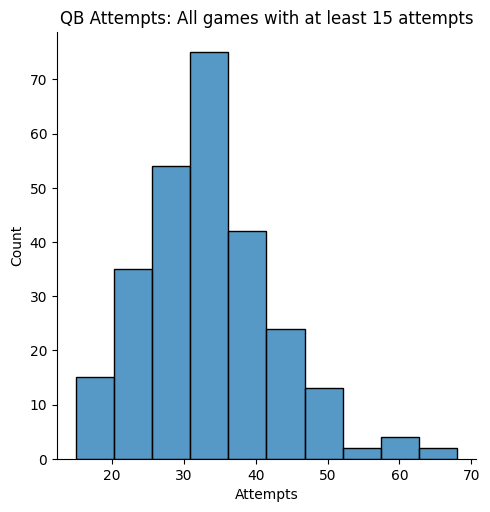

In [57]:
g = sns.displot(
    x="attempts",
    data=df_2022,
    kind="hist",
    bins=10
)

g.set(
    title="QB Attempts: All games with at least 15 attempts",
    xlabel="Attempts"
)

In [60]:
df_2022.describe().round(2)

,week,completions,attempts,comp_pct,pass_yds,pass_tds,int,pass_air_yds,pts,games_played
count,266.00,266.00,266.00,266.00,266.00,266.00,266.00,266.00,266.00,266.00
mean,4.84,21.65,33.56,64.45,235.95,1.37,0.71,254.12,16.04,7.07
std,2.57,6.51,9.13,9.16,72.49,1.09,0.86,89.49,7.78,1.96
min,1.00,5.00,15.00,31.25,60.00,0.00,0.00,-1.00,0.88,1.00
25%,3.00,17.25,27.00,59.09,188.50,1.00,0.00,187.00,10.70,6.00
50%,5.00,21.00,33.00,64.52,234.00,1.00,1.00,246.50,15.28,8.00
75%,7.00,25.00,39.00,70.70,277.75,2.00,1.00,304.75,19.29,8.00
max,9.00,43.00,68.00,90.91,481.00,6.00,4.00,534.00,42.72,9.00


## Top QBs by Completion Percentage

In [64]:
# Order QBs by completion percentage for only those who have played every possible game through Week 9
# Players with only 8 games had a Bye Week
by_player_2022 = df_2022\
    .groupby('player_name')\
    .mean()\
    .sort_values(['games_played', 'comp_pct'], ascending=[False, False])\
    .round(2)

by_player_2022[by_player_2022['games_played'] >= 8]

/var/folders/pr/phs5jp1d143fx1t05hqzwt580000gn/T/ipykernel_66894/2901853253.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()\


,week,completions,attempts,comp_pct,pass_yds,pass_tds,int,pass_air_yds,pts,games_played
player_name,,,,,,,,,,
Geno Smith,5.00,23.00,31.44,73.14,244.33,1.67,0.44,236.33,18.17,9.0
Joe Burrow,5.00,25.89,37.00,70.28,281.67,2.00,0.67,246.89,22.17,9.0
Kyler Murray,5.00,26.67,40.00,67.04,240.89,1.33,0.67,263.56,19.40,9.0
Trevor Lawrence,5.00,22.00,34.22,66.01,230.56,1.22,0.67,255.11,15.58,9.0
Aaron Rodgers,5.00,22.78,35.22,65.32,232.33,1.56,0.78,264.67,13.96,9.0
Tom Brady,5.00,28.89,44.22,64.97,283.00,1.11,0.11,299.67,15.26,9.0
Lamar Jackson,5.00,17.78,28.56,61.61,196.44,1.78,0.67,245.78,21.80,9.0
Jalen Hurts,4.75,20.38,29.88,68.10,255.25,1.50,0.25,218.62,24.28,8.0
Matthew Stafford,4.75,24.38,35.62,68.09,241.00,1.00,1.00,225.00,11.70,8.0


Just as I saw yesterday, we have a top two: Geno Smith and Joe Burrow. Geno has a 3% higher completion percentage but Joe is beating him on:
- Attempts: 18% more per game, on average
- Passing Yards: 15% higher
- Pass TDs: 1/3rd of a TD higher, per gam, which equates to 2.5 more touchdowns over the next 8 games
- Passing Air Yards: slightly better (basically even)
- Fantasy Points: About 4 pts higher, per game

Joe is slightly worse, but still around average, when it comes to interceptions.

The most important question is, as fantasy managers, do we care that Geno Smith has the highest completion percentage? No, fantasy managers care about production and Joe Burrow is an example of why completion percentage can be a **misleading statistic**. 

Joe has higher attempts, passing yards, and touchdowns. All he needs is a *high enough* completion percentage and he is going to score more points. Period. 

In [70]:
# Aggregate by week to find the average completion percentage per week
# Will leave out both Geno Smith and Joe Burrow

f_geno = df_2022['player_name'] == 'Geno Smith'
f_joe = df_2022['player_name'] == 'Joe Burrow'

by_week = df_2022[(~f_geno) & (~f_joe)] \
    .groupby('week') \
    .mean() \
    .reset_index()

by_player_week = df_2022 \
    .groupby(['week', 'player_name']) \
    .mean() \
    .reset_index()

/var/folders/pr/phs5jp1d143fx1t05hqzwt580000gn/T/ipykernel_66894/1282881947.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean() \
/var/folders/pr/phs5jp1d143fx1t05hqzwt580000gn/T/ipykernel_66894/1282881947.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean() \


In [77]:
by_week.round(2)

,week,completions,attempts,comp_pct,pass_yds,pass_tds,int,pass_air_yds,pts,games_played
0,1,22.00,34.53,63.49,242.13,1.57,0.77,255.90,16.64,6.77
1,2,22.34,34.79,64.25,244.34,1.83,0.86,266.59,17.96,7.00
2,3,22.50,35.63,63.20,251.10,1.13,0.70,290.40,15.35,7.03
3,4,20.32,31.96,62.86,228.29,1.36,0.82,241.25,15.21,7.21
4,5,21.63,33.70,64.46,239.83,0.93,0.63,259.17,14.54,7.07
5,6,21.04,33.40,62.82,215.72,1.24,0.64,233.24,14.00,6.92
6,7,22.04,33.20,66.80,236.68,1.12,0.76,241.08,14.34,6.56
7,8,21.04,31.74,66.73,239.41,1.52,0.74,250.56,17.17,6.78
8,9,19.67,32.08,60.58,199.38,1.33,0.58,248.92,16.18,6.96


In [72]:
by_player_week[by_player_week['player_name'] == 'Geno Smith']

,week,player_name,completions,attempts,comp_pct,pass_yds,pass_tds,int,pass_air_yds,pts,games_played
7,1,Geno Smith,23.0,28.0,82.14,195.0,2.0,0.0,144.0,17.20,9.0
39,2,Geno Smith,24.0,30.0,80.00,197.0,0.0,1.0,162.0,6.08,9.0
70,3,Geno Smith,32.0,44.0,72.73,325.0,2.0,1.0,412.0,18.90,9.0
103,4,Geno Smith,23.0,30.0,76.67,320.0,2.0,0.0,320.0,31.70,9.0
134,5,Geno Smith,16.0,25.0,64.00,268.0,3.0,0.0,294.0,24.02,9.0
163,6,Geno Smith,20.0,31.0,64.52,197.0,0.0,0.0,213.0,12.68,9.0
192,7,Geno Smith,20.0,27.0,74.07,210.0,2.0,1.0,206.0,13.10,9.0
217,8,Geno Smith,23.0,34.0,67.65,212.0,2.0,0.0,273.0,19.08,9.0
245,9,Geno Smith,26.0,34.0,76.47,275.0,2.0,1.0,103.0,20.80,9.0


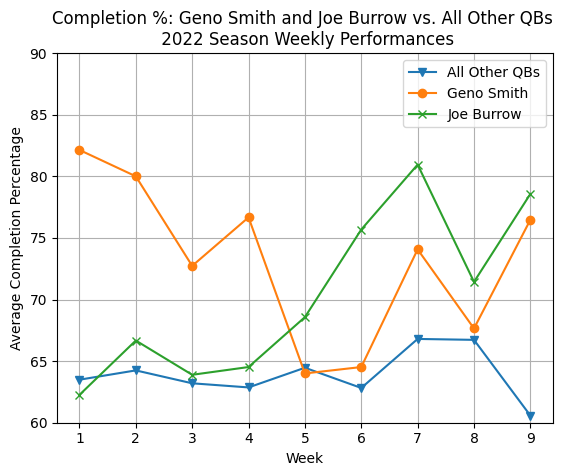

In [76]:
plt.plot(
    'week', 
    'comp_pct', 
    data=by_week,
    marker='v', 
    label='All Other QBs',)
plt.plot(
    'week', 
    'comp_pct', 
    data=by_player_week[by_player_week['player_name'] == 'Geno Smith'],
    marker='o',
    label='Geno Smith')
plt.plot(
    'week', 
    'comp_pct', 
    data=by_player_week[by_player_week['player_name'] == 'Joe Burrow'],
    marker='x',
    label='Joe Burrow')

plt.xlabel('Week')
plt.ylabel('Average Completion Percentage')
plt.title('Completion %: Geno Smith and Joe Burrow vs. All Other QBs \n 2022 Season Weekly Performances')

plt.legend(loc="upper right")
plt.ylim(60,90)
plt.grid()

plt.show()

After a slow start Joe is actually **outperforming Geno since Week 5**.